In [1]:
# 仮説「喘息発症の確率はアトピー性皮膚炎患児の場合、食物アレルギー感作がある場合は増加する」
# ロジスティック回帰モデルを用いて、以上の仮説検定を行う。

In [2]:
# 使用するデータの作成
import pandas as pd
import japanize_matplotlib

# 人種の影響が出ない様にそれぞれの人種数を合わせたデータを使用する
allergy_data = pd.read_csv('../Data/race_sample.csv')
display(allergy_data.head(10))
allergy_data.dtypes

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,256086,2001,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,2.913073,9.185489,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.028063,8.706366,2.0
1,48892,2006,S1 - Female,Asian,E0 - Non-Hispanic,P1 - Medicaid,False,1.982204,6.915811,NaN,...,NaN,NaN,NaN,2.499658,NaN,NaN,NaN,6.045175,6.915811,2.0
2,264558,1990,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,10.718686,18.778919,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70323,1997,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.216290,16.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,3.824778,12.999316,9.516769,9.516769,1.0
4,31931,2007,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,5.965777,NaN,...,NaN,0.095825,2.01232,5.921971,NaN,3.014374,NaN,2.053388,5.921971,6.0
5,296184,2000,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.580424,12.331280,NaN,...,NaN,NaN,NaN,6.422998,NaN,6.951403,NaN,6.433949,12.936345,24.0
6,301397,2005,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.043806,1.883641,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,272297,1993,S1 - Female,Asian,E0 - Non-Hispanic,P1 - Medicaid,False,12.468172,17.976728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,87279,2010,S0 - Male,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,3.271732,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,276306,1994,S1 - Female,Asian,E0 - Non-Hispanic,P0 - Non-Medicaid,False,11.000684,18.781656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SUBJECT_ID                   int64
BIRTH_YEAR                   int64
GENDER_FACTOR               object
RACE_FACTOR                 object
ETHNICITY_FACTOR            object
PAYER_FACTOR                object
ATOPIC_MARCH_COHORT           bool
AGE_START_YEARS            float64
AGE_END_YEARS              float64
SHELLFISH_ALG_START        float64
SHELLFISH_ALG_END          float64
FISH_ALG_START             float64
FISH_ALG_END               float64
MILK_ALG_START             float64
MILK_ALG_END               float64
SOY_ALG_START              float64
SOY_ALG_END                float64
EGG_ALG_START              float64
EGG_ALG_END                float64
WHEAT_ALG_START            float64
WHEAT_ALG_END              float64
PEANUT_ALG_START           float64
PEANUT_ALG_END             float64
SESAME_ALG_START           float64
SESAME_ALG_END             float64
TREENUT_ALG_START          float64
TREENUT_ALG_END            float64
WALNUT_ALG_START           float64
WALNUT_ALG_END      

In [3]:
# アトピーと喘息、食物アレルギーのカラムのみにする
allergy_data = allergy_data.reindex(columns=['ATOPIC_DERM_START', 'ASTHMA_START',
                                          'SHELLFISH_ALG_START', 'FISH_ALG_START','MILK_ALG_START',
                                          'SOY_ALG_START' ,'EGG_ALG_START', 'WHEAT_ALG_START',
                                          'PEANUT_ALG_START', 'SESAME_ALG_START','TREENUT_ALG_START',
                                          'WALNUT_ALG_START' ,'PECAN_ALG_START', 'PISTACH_ALG_START',
                                          'ALMOND_ALG_START', 'BRAZIL_ALG_START','HAZELNUT_ALG_START',
                                          'CASHEW_ALG_START'])

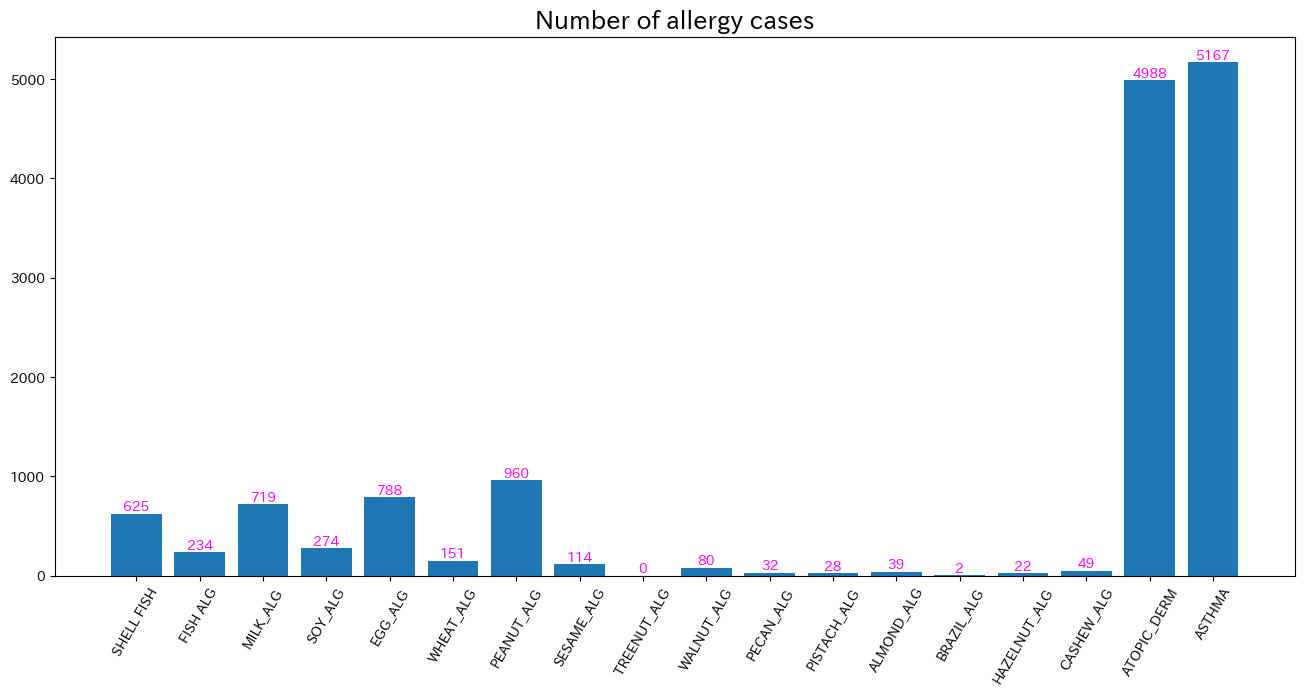

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# 全体のアレルギーの分布
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', va = 'bottom', c = 'Magenta')


plt.figure(figsize=(16, 7))
x=['SHELL FISH', 'FISH ALG', 'MILK_ALG', 'SOY_ALG', 'EGG_ALG', 'WHEAT_ALG', 'PEANUT_ALG',
   'SESAME_ALG', 'TREENUT_ALG', 'WALNUT_ALG', 'PECAN_ALG', 'PISTACH_ALG', 'ALMOND_ALG',
   'BRAZIL_ALG', 'HAZELNUT_ALG', 'CASHEW_ALG', 'ATOPIC_DERM', 'ASTHMA']
height=[
    allergy_data["SHELLFISH_ALG_START"].count(),allergy_data["FISH_ALG_START"].count(),
    allergy_data["MILK_ALG_START"].count(),allergy_data["SOY_ALG_START"].count(),
    allergy_data["EGG_ALG_START"].count(),allergy_data["WHEAT_ALG_START"].count(),
    allergy_data["PEANUT_ALG_START"].count(),allergy_data["SESAME_ALG_START"].count(),
    allergy_data["TREENUT_ALG_START"].count(),allergy_data["WALNUT_ALG_START"].count(),
    allergy_data["PECAN_ALG_START"].count(),allergy_data["PISTACH_ALG_START"].count(),
    allergy_data["ALMOND_ALG_START"].count(),allergy_data["BRAZIL_ALG_START"].count(),
    allergy_data["HAZELNUT_ALG_START"].count(),allergy_data["CASHEW_ALG_START"].count(),
    allergy_data["ATOPIC_DERM_START"].count(),allergy_data["ASTHMA_START"].count()]
plt.bar(x=x, height=height)

addlabels(x, height)
plt.xticks(rotation=60)
plt.title('Number of allergy cases', fontsize=18)
plt.box(True)
# results_path = './Graphs/Number of allergy cases.png'
# plt.savefig(results_path, bbox_inches='tight')
plt.show()

In [5]:
# 説明変数をアレルギーの量とする。
# アレルゲンをブール値へ変更
allergy_data['SHELLFISH_ALG_START'] = allergy_data['SHELLFISH_ALG_START'].notna()
allergy_data['FISH_ALG_START'] = allergy_data['FISH_ALG_START'].notna()
allergy_data['MILK_ALG_START'] = allergy_data['MILK_ALG_START'].notna()
allergy_data['SOY_ALG_START'] = allergy_data['SOY_ALG_START'].notna()
allergy_data['EGG_ALG_START'] = allergy_data['EGG_ALG_START'].notna()
allergy_data['WHEAT_ALG_START'] = allergy_data['WHEAT_ALG_START'].notna()
allergy_data['PEANUT_ALG_START'] = allergy_data['PEANUT_ALG_START'].notna()
allergy_data['SESAME_ALG_START'] = allergy_data['SESAME_ALG_START'].notna()
allergy_data['TREENUT_ALG_START'] = allergy_data['TREENUT_ALG_START'].notna()
allergy_data['WALNUT_ALG_START'] = allergy_data['WALNUT_ALG_START'].notna()
allergy_data['PECAN_ALG_START'] = allergy_data['PECAN_ALG_START'].notna()
allergy_data['PISTACH_ALG_START'] = allergy_data['PISTACH_ALG_START'].notna()
allergy_data['ALMOND_ALG_START'] = allergy_data['ALMOND_ALG_START'].notna()
allergy_data['BRAZIL_ALG_START'] = allergy_data['BRAZIL_ALG_START'].notna()
allergy_data['HAZELNUT_ALG_START'] = allergy_data['HAZELNUT_ALG_START'].notna()
allergy_data['CASHEW_ALG_START'] = allergy_data['CASHEW_ALG_START'].notna()
allergy_data

,ATOPIC_DERM_START,ASTHMA_START,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START
0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,NaN,3.824778,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.095825,3.014374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.183436,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26996,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26997,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26998,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# 計算に必要なアレルゲンのみのデータ作成
food_allergen = allergy_data[["SHELLFISH_ALG_START", "FISH_ALG_START","MILK_ALG_START", "SOY_ALG_START",
                 "EGG_ALG_START", "WHEAT_ALG_START","PEANUT_ALG_START", "SESAME_ALG_START",
                 "TREENUT_ALG_START", "WALNUT_ALG_START","PECAN_ALG_START", "PISTACH_ALG_START",
                 "ALMOND_ALG_START", "BRAZIL_ALG_START","HAZELNUT_ALG_START", "CASHEW_ALG_START"]]

In [7]:
# アレルゲンの合計値を計算し、TOTAL_FOOD_ALLERGENを作成しそこに代入する
food_allergen = food_allergen.assign(TOTAL_FOOD_ALLERGEN = food_allergen.sum(axis=1))
food_allergen

,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,TOTAL_FOOD_ALLERGEN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [8]:
# 得られたアレルゲンのデータとその合計値をアトピーと喘息のデータと統合させる。
atop_athma = allergy_data[['ATOPIC_DERM_START', 'ASTHMA_START']]
allergy_data = pd.merge(atop_athma, food_allergen, how='outer', left_index=True, right_index=True)
allergy_data

,ATOPIC_DERM_START,ASTHMA_START,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,TOTAL_FOOD_ALLERGEN
0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,NaN,3.824778,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,0.095825,3.014374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.183436,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26996,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26997,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26998,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [9]:
# アレルギー感作があるアトピー発症後に喘息発症のデータ抽出
atop_aft_asth = allergy_data[(allergy_data["ASTHMA_START"] > allergy_data["ATOPIC_DERM_START"])]
atop_aft_asth_posi = atop_aft_asth[(atop_aft_asth["TOTAL_FOOD_ALLERGEN"] > 0)]
atop_aft_asth_posi

,ATOPIC_DERM_START,ASTHMA_START,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,TOTAL_FOOD_ALLERGEN
74,0.334018,1.344285,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,2
78,2.097194,5.032170,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2
109,0.449008,1.325120,False,False,True,False,True,False,True,False,False,True,True,True,False,False,True,True,8
329,5.913758,11.843943,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1
358,0.303901,7.770021,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26567,1.026694,1.730322,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
26694,0.273785,4.818617,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,2
26799,0.520192,1.037645,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,3
26895,2.442163,5.034908,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1


In [10]:
# アレルギー感作があるアトピー性皮膚炎の喘息未発症のデータ抽出
atop_only = allergy_data[(allergy_data["ATOPIC_DERM_START"].notnull() == True) &
                              (allergy_data["ASTHMA_START"].notnull() == False)]
atop_only_posi = atop_only[(atop_only["TOTAL_FOOD_ALLERGEN"] > 0)]
atop_only_posi

,ATOPIC_DERM_START,ASTHMA_START,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,TOTAL_FOOD_ALLERGEN
21,1.103354,NaN,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,3
72,2.327173,NaN,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,2
188,0.353183,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1
203,7.077344,NaN,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,4
320,4.093087,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26824,0.651608,NaN,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,2
26832,1.615332,NaN,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,3
26849,1.604381,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1
26880,0.303901,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1


In [11]:
# アレルギー感作がないアトピー性皮膚炎の喘息発症のデータ抽出
atop_aft_asth_nega = atop_aft_asth[(atop_aft_asth["TOTAL_FOOD_ALLERGEN"] == 0)]
atop_aft_asth_nega

,ATOPIC_DERM_START,ASTHMA_START,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,TOTAL_FOOD_ALLERGEN
4,0.095825,3.014374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
86,3.216975,3.345654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
146,0.205339,5.935661,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
216,0.451745,1.002053,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
333,3.112936,5.856263,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26603,7.674196,7.865845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26648,1.374401,3.550992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26735,0.175222,1.002053,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26744,0.281999,4.826831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [12]:
# アレルギー感作がないアトピー性皮膚炎の喘息未発症のデータ抽出
atop_only_nega = atop_only[(atop_only["TOTAL_FOOD_ALLERGEN"] == 0)]
atop_only_nega

,ATOPIC_DERM_START,ASTHMA_START,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,TOTAL_FOOD_ALLERGEN
16,2.587269,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
29,11.140315,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
30,1.483915,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
32,3.307324,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
40,2.663929,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26974,3.085558,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26982,0.495551,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26987,0.186174,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
26992,0.380561,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [13]:
# それぞれのデータにデータ特性の変数をつける
atop_aft_asth_posi = atop_aft_asth_posi.assign(feature = 'アレルギー感作があるアトピー性皮膚炎:喘息発症あり')
atop_only_posi = atop_only_posi.assign(feature = 'アレルギー感作があるアトピー性皮膚炎:喘息発症なし')
atop_aft_asth_nega = atop_aft_asth_nega.assign(feature = 'アレルギー感作がないアトピー性皮膚炎:喘息発症あり')
atop_only_nega = atop_only_nega.assign(feature = 'アレルギー感作がないアトピー性皮膚炎:喘息発症なし')

In [14]:
# データをマージする
atop_posi = pd.merge(atop_aft_asth_posi, atop_only_posi, how='outer')
atop_nega = pd.merge(atop_aft_asth_nega, atop_only_nega, how='outer')
total = pd.merge(atop_posi, atop_nega, how='outer')
total

,ATOPIC_DERM_START,ASTHMA_START,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,TOTAL_FOOD_ALLERGEN,feature
0,0.334018,1.344285,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,2,アレルギー感作があるアトピー性皮膚炎:喘息発症あり
1,2.097194,5.032170,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2,アレルギー感作があるアトピー性皮膚炎:喘息発症あり
2,0.449008,1.325120,False,False,True,False,True,False,True,False,False,True,True,True,False,False,True,True,8,アレルギー感作があるアトピー性皮膚炎:喘息発症あり
3,5.913758,11.843943,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1,アレルギー感作があるアトピー性皮膚炎:喘息発症あり
4,0.303901,7.770021,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,2,アレルギー感作があるアトピー性皮膚炎:喘息発症あり
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,13.026694,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,アレルギー感作がないアトピー性皮膚炎:喘息発症なし
4255,3.734428,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,アレルギー感作がないアトピー性皮膚炎:喘息発症なし
4256,0.134155,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,アレルギー感作がないアトピー性皮膚炎:喘息発症なし
4257,1.541410,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,アレルギー感作がないアトピー性皮膚炎:喘息発症なし


In [15]:
# csvとして出力
# total.to_csv('../Data/atop_athma_food_allergen.csv', mode='w', index=False)

In [16]:
# ロジスティック回帰モデルで検証しやすい様に必要なカラムとインデックスのみを抽出
total_logi = total[(total["feature"] == 'アレルギー感作があるアトピー性皮膚炎:喘息発症あり')|
                       (total["feature"] == 'アレルギー感作がないアトピー性皮膚炎:喘息発症なし')]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 説明変数にTOTAL_FOOD_ALLERGENを設定
X = total_logi[['TOTAL_FOOD_ALLERGEN']]

# 目的変数にfeatureのそれぞれを0,1に設定
# 「アレルギー感作があるアトピー性皮膚炎:喘息発症あり」が起こる可能性が「アレルギー感作がないアトピー性皮膚炎:喘息発症なし」が起こる可能性に
# 比べてどれだけ起こりやすいかをみる
Y = total_logi['feature'].map({'アレルギー感作がないアトピー性皮膚炎:喘息発症なし': 0, 'アレルギー感作があるアトピー性皮膚炎:喘息発症あり': 1})

# それぞれの変数のデータを訓練用とテスト用に分ける。今回は80%を訓練用にして、20％を検証様に設定する。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# ロジスティック回帰モデルの変数を作成
lrmodel = LogisticRegression()

# モデルに訓練データを学習させる
lrmodel.fit(X_train, Y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = lrmodel.predict(X_test)
print ('モデル精度', lrmodel.score(X_test, Y_test))
print('test_Xに対するモデルの分類予測結果\n', y_pred)
print('混同行列 = \n', confusion_matrix(y_true=Y_test, y_pred=y_pred))
print('正解率 = ', accuracy_score(y_true=Y_test, y_pred=y_pred))
print('適合率 = ', precision_score(y_true=Y_test, y_pred=y_pred))
print('再現率 = ', recall_score(y_true=Y_test, y_pred=y_pred))
print('F1値 = ', f1_score(y_true=Y_test, y_pred=y_pred))
# モデルの精度は非常に高い事が分かる

モデル精度 1.0
test_Xに対するモデルの分類予測結果
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [20]:
print("説明変数の係数 = ", lrmodel.coef_)
print("切片 = ", lrmodel.intercept_)
# 係数と切片より、アトピー性皮膚炎患児のアレルギー感作の数が多いと、喘息の発症率は高くなることが証明された。
# よって仮説の「喘息発症の確率はアトピー性皮膚炎患児の場合、食物アレルギー感作がある場合は増加する」の
# 帰無仮説は棄却され、対立仮説は正しい事が証明された。

説明変数の係数 =  [[8.1308928]]
切片 =  [-5.67377654]
